# Creating Visualizations for Project

## Importing Visualization Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick
import os

In [44]:
path=r'C:\Users\steve\Documents\CF - Achieve_6\Data'

In [45]:
df=pd.read_excel(os.path.join(path,'AdidasDataset_Cleaned.xlsx'))

## Performing Basic Checks

In [46]:
# Checking output of dataframe
df.head()

,Unnamed: 0,retailer,invoice,region,state,city,product,price_per_unit,units_sold,income,profit,profit_margin,sales_method
0,0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [47]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0        0
retailer          0
invoice           0
region            0
state             0
city              0
product           0
price_per_unit    0
units_sold        0
income            0
profit            0
profit_margin     0
sales_method      0
dtype: int64

In [48]:
# Checking for Duplicates
df_dups = df[df.duplicated()]

In [49]:
# Checking to see if there are any rows of duplicates
df_dups.shape

(0, 13)

In [50]:
# Checking for mixed data types
for col in df.columns.tolist():
        weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
        if len (df[weird]) > 0:
            print (col)
# No results means no mixed data types

## Checking for Correlations

In [51]:
# Using df.corr, it showed that the retailer column contained string that could not be converted to float
# Working around that using a temp table and dropping that column
corr_df = df.drop(['Unnamed: 0','invoice','retailer','region','state','city','product', 'sales_method'], axis=1)

In [52]:
corr_df.corr()

,price_per_unit,units_sold,income,profit,profit_margin
price_per_unit,1.000000,0.265527,0.435676,0.394406,-0.137323
units_sold,0.265527,1.000000,0.913459,0.892404,-0.305378
income,0.435676,0.913459,1.000000,0.956300,-0.364550
profit,0.394406,0.892404,0.956300,1.000000,-0.211844
profit_margin,-0.137323,-0.305378,-0.364550,-0.211844,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

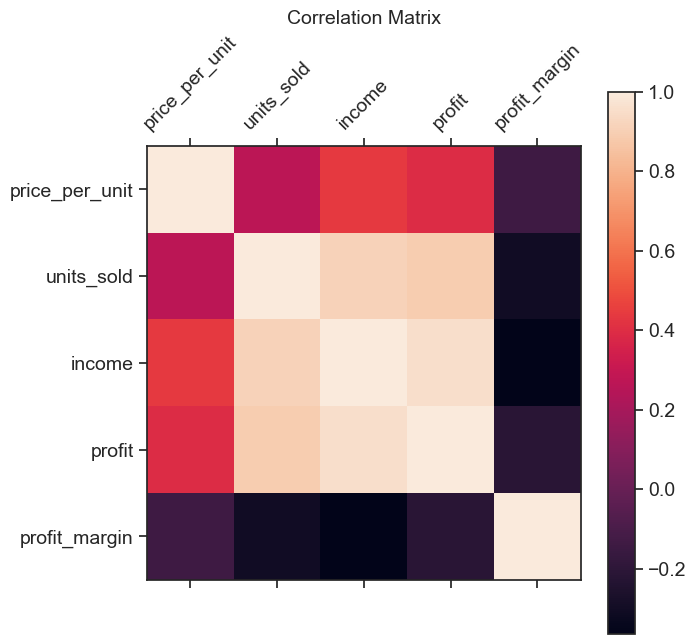

In [53]:
# Creating a heatmap of the correlation matrix
f = plt.figure(figsize=(7, 7)) # figure size 
plt.matshow(corr_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14)
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # title

The colors are a little harder to see, going to see if the Seaborn version is more ideal.

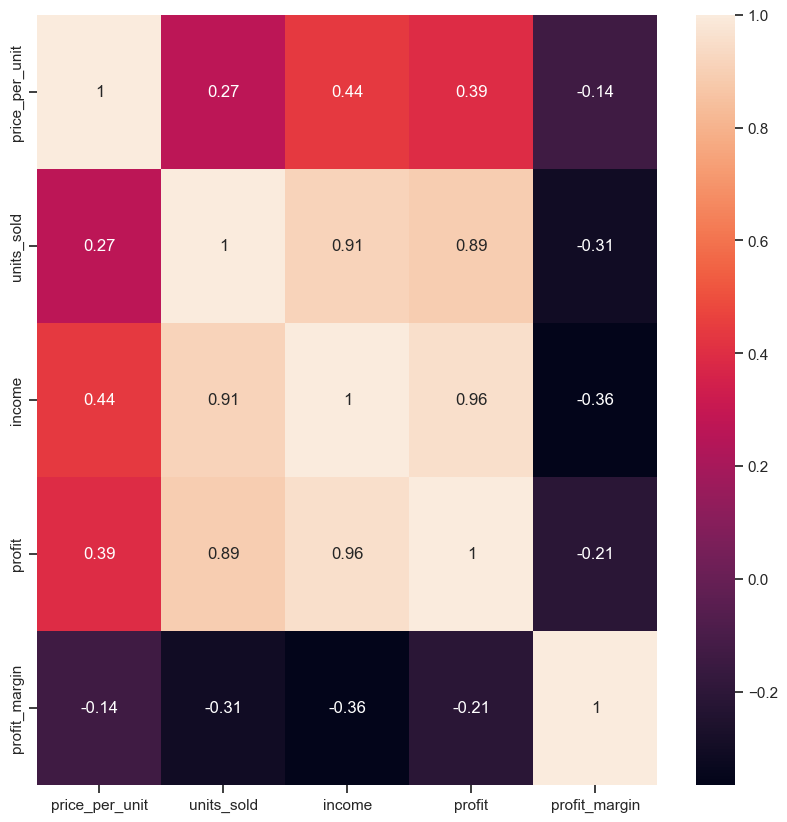

In [54]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
sea_df = sns.heatmap(corr_df.corr(), annot = True, ax = ax)

### Insight:
This appears much easier to read as opposed to the one created via MatPlotLib

There appears to be a few strong correlations. Of note they are:

<b>Income to Units_Sold:</b>
There appears to be a strong, positive correlation to these two.  This makes sense because the more units a location sells, the more income they generate.

<b>Profit to Units_Sold:</b>
There appears to be a strong, positive correlation to these two.  This also makes sense, as more units being sold typically equates to more profits.

<b>Profit to Income:</b>
There appears to be a strong, positive correlation to these two.  In retailer situations, making more income often means more chances at profits.

<b>Profit_Margin to Price_Per_Unit:</b>
This one is interesting because it is very close to being 0, having no correlation between these two. Normally this would not be much, but the price of a product does not have any influence on its profitability.

<b>NOTE:</b> The rest of the comparisons appear to have weak to no correlations between one another.




## Utilizing Scatterplots to Explore Further

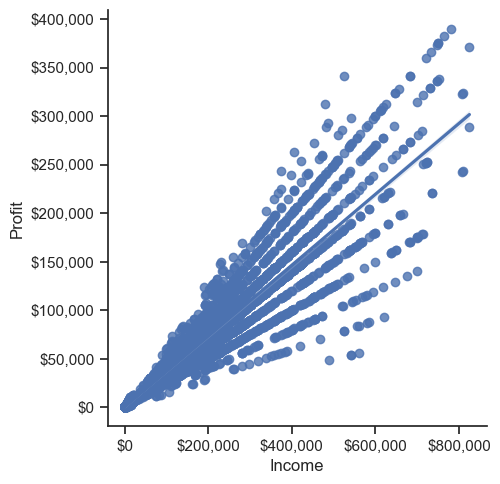

In [55]:
# Creating a scatterplot for the variables with the strongest correlation
sns.lmplot(x = 'income', y = 'profit', data = corr_df)

# Adjusting font size for x and y axis labels
plt.xlabel('Income', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Wanted to add $ to the values, doing so with the following
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().xaxis.set_major_formatter(tick)
plt.gca().yaxis.set_major_formatter(tick)

### Insight:
Early on the correlation appears strong. However, as we get further along in both the income and the profits, we start seeing more spread.

It is odd looking at the income - for example, a few stores generated `$500,000.00` in sales, but their profits varied anywhere from `$350,000.00` to `$50,000.00`, that is 7x the difference. This stood out because we saw no correlation previously with how high or low a product costs and its margin of profit.

It may be possible that the profitable locations are simply selling high profitability products, but more digging in would be necessary.


## Creating Pair Plots

In [56]:
# Making a new df to store the variables needed for the pair plot
corr_df_cut = df[['price_per_unit','income','profit','units_sold']]

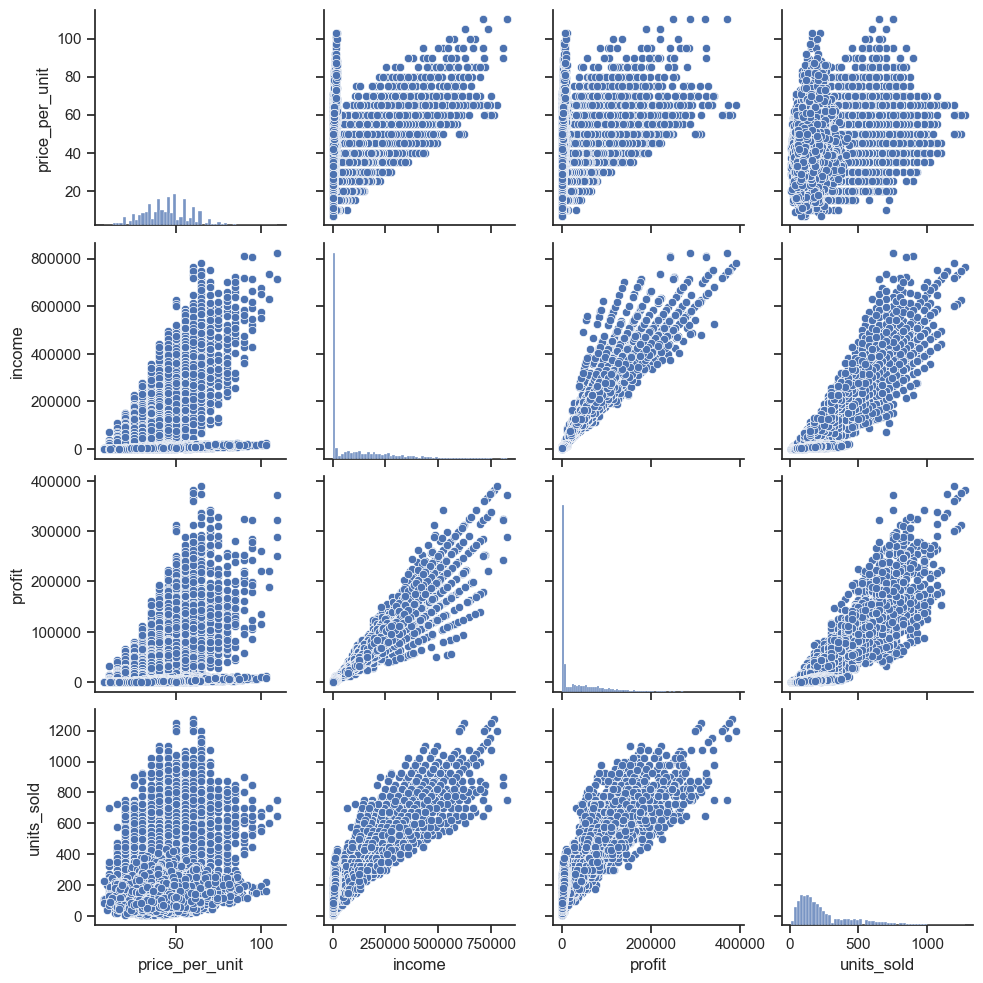

In [57]:
# Creating the pair plot
pplot = sns.pairplot(corr_df_cut)

### Insights:
We can clearly see the correlation for units_sold:income, units_sold:profit, proft:income are a strong positive one.  We can sort of see a similar behavior for lower priced units, but it is in the weaker realm of correlations.

With that said, there are some odd behaviors that stand out.  Of note, the patterns are not as uniform when less units are sold, despite their pricing.  We also see some fairly apparent lines that are not following where typical trend lines would be.  It appears to be a case of products not making much income, whether they are priced high or low.  This is especially curious because there does appear to be a pattern where lower priced items have less ceiling when it comes to profitability, while higher priced items have a much higher ceiling and floor.

## Creating Categorical Plot

<Axes: xlabel='price_per_unit', ylabel='Count'>

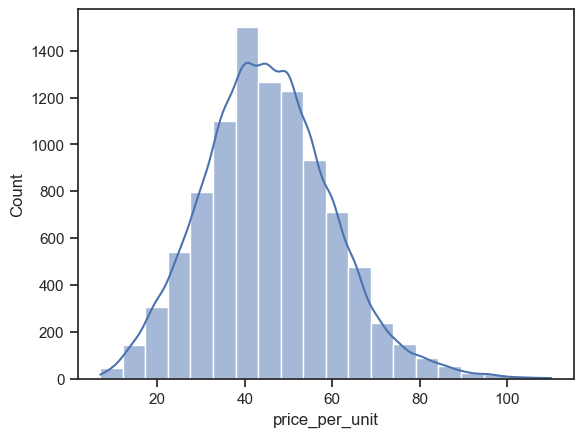

In [58]:
# Creating a histogram with to visualize the distribution of products via prices.
sns.histplot(df['price_per_unit'], bins = 20, kde = True)

Viewing the range of prices for the products Adidas sells.  The majority of products are within the `$40` range, due to this it might be ideal to set the low range as anything under `$40` and everything over `$60` can be considered high range.  The rest will be the middle range.

In [59]:
# Creating a new column, price_category, and assigning entries based on pricing
df.loc[df['price_per_unit'] < 40, 'price_category'] = 'low_price'

In [60]:
df.loc[(df['price_per_unit'] >= 40) & (df['price_per_unit'] <= 60), 'price_category'] = 'mid_price'

In [61]:
df.loc[df['price_per_unit'] > 60, 'price_category'] = 'high_price'

In [62]:
df['price_category'].value_counts()

price_category
mid_price     4960
low_price     3324
high_price    1360
Name: count, dtype: int64

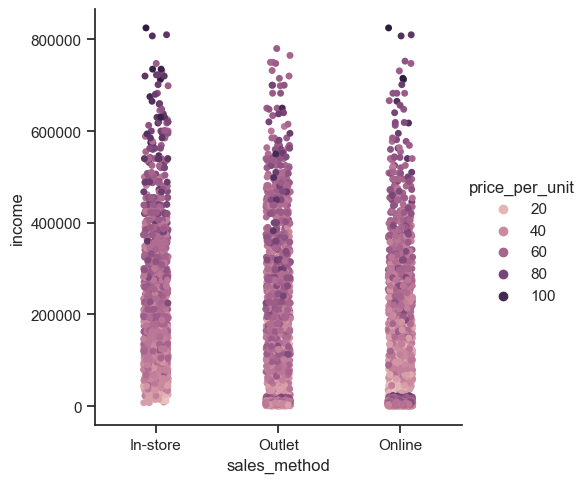

In [63]:
# Create a categorical plot in seaborn using the price categories created above
# Using price_per_unit as hue to see how it affects other factors.
sns.set(style="ticks")
catdf_income = sns.catplot(x="sales_method", y="income", hue="price_per_unit", data=df)

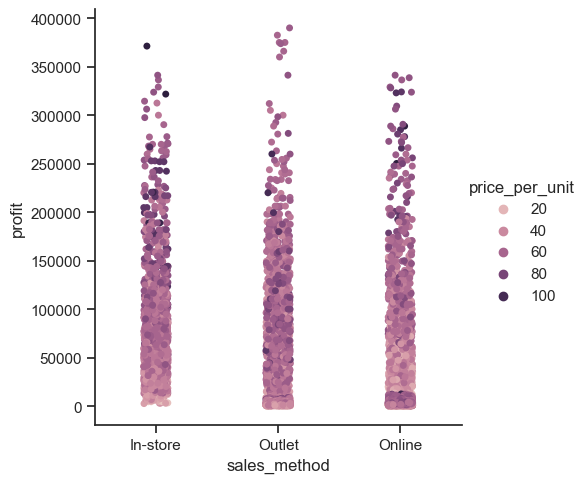

In [64]:
# The above chart shows how much money was collected via the various methods of retail

sns.set(style="ticks")
catdf_profit = sns.catplot(x="sales_method", y="profit", hue="price_per_unit", data=df)

# After seeing that, I wanted to compare that to profits, so I created that below

#### Insights:
While the lower profit portions look similar between the two, looking at the higher ends of profitability, we can observe some changes to behavior.  Essentially the higher priced items brought in more money, but their profitability was on the lower to middle end of value.  It looks like mid-priced items bring in higher profits and added up, they make up most of a location's profitability.

The lower priced items, while there are a few outliers, appear to make up the lowest end of profitability.  It appears that they are used to pull in customers, in an effort to get them to notice and purchase the higher cost products.

#### Answers to Questions:
Not too many of the business questions have been addressed so far.  However, we can see that the price of a product does not have a correlation to its popularity.  Additionally, we can also see that while there is a positive correlation to the price of products and the amount of income and profit they generate, it is a very weak one.

<b>Hypothesis:</b> Looking at the ranges in profit/income for high priced items, it looks like certain locations are generating significantly more revenue with the same products.  This may be due to location/regions, or possibly gender of the products.

In [65]:
df.head()

,Unnamed: 0,retailer,invoice,region,state,city,product,price_per_unit,units_sold,income,profit,profit_margin,sales_method,price_category
0,0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,mid_price
1,1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,mid_price
2,2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,mid_price
3,3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,mid_price
4,4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,mid_price


In [66]:
df.to_excel(os.path.join(path,'Adidas_Dataset_AddPriceCat.xlsx'))